In [1]:
from amuse.units import units
from amuse.lab import Particles, new_kroupa_mass_distribution
from amuse.community.seba.interface import SeBa
import numpy as np
from amuse.ic.kingmodel import new_king_model
import matplotlib.pyplot as plt

In [3]:
from amuse.units import units
from amuse.lab import Particles, new_kroupa_mass_distribution
from amuse.community.seba.interface import SeBa 
import numpy as np
from amuse.ic.kingmodel import new_king_model
import matplotlib.pyplot as plt

# Define the number of stars in the cluster
number_of_stars = 1000
new_stars = 200
# Sample initial masses from the Kroupa IMF
initial_masses_C = new_kroupa_mass_distribution(number_of_stars, mass_min=0.1|units.MSun, mass_max=100 |units.MSun)
new_stars_imf =  new_kroupa_mass_distribution(new_stars, mass_min=0.1|units.MSun, mass_max=100 |units.MSun)

r_cluster = 1.0 | units.parsec
from amuse.units import nbody_system
converter_C=nbody_system.nbody_to_si(initial_masses_C.sum(), r_cluster)
converter_N = nbody_system.nbody_to_si(new_stars_imf.sum(), r_cluster)

stars_C=new_king_model(number_of_stars, convert_nbody=converter_C, W0 = 3)
stars_C.mass = initial_masses_C
stars_C.scale_to_standard(converter_C)

stars_N=new_king_model(new_stars, convert_nbody=converter_N, W0 = 3)
stars_N.mass = new_stars_imf
stars_N.scale_to_standard(converter_N)

# for i in range(number_of_stars):
#     star = star_cluster.add_particle()
#     star.mass=initial_masses[i]
#     star.age = ages[i % len(ages)]  # Assign ages cyclically

# Initialize a stellar evolution code (e.g., SeBa)
stellar_evolution_code = SeBa()
z_cluster = 0.002
stellar_evolution_code.parameters.metallicity = z_cluster

# Evolve the stars in the cluster
stellar_evolution_code.particles.add_particles(stars_C)
ch_s2l = stellar_evolution_code.particles.new_channel_to(stars_C)
ch_s2l.copy()




In [4]:
# Initialize a stellar evolution code (e.g., SeBa)
stellar_evolution_code_N = SeBa()
z_MC = 0.02
stellar_evolution_code_N.parameters.metallicity = z_MC

# Evolve the stars in the cluster
stellar_evolution_code_N.particles.add_particles(stars_N)
channel = stellar_evolution_code_N.particles.new_channel_to(stars_N)
channel.copy()

In [ ]:
initial_masses

# CLUSTER EVOLVER


In [6]:
end_time = 10.0 | units.Gyr
model_time = 0 | units.Myr
time = []


while(model_time<end_time):
    np.random.seed(17)
    dt = 2 | units.Gyr
    model_time += dt

    stellar_evolution_code.evolve_model(model_time)
    ch_s2l.copy()
    
    time.append(model_time.value_in(units.Myr))
    
stellar_evolution_code.stop()

# NEW STARS

In [7]:
end_time = 100.0 | units.Myr
model_time = 0 | units.Myr
time = []


while(model_time<end_time):
    np.random.seed(17)
    dt = 5 | units.Myr
    model_time += dt

    stellar_evolution_code_N.evolve_model(model_time)
    channel.copy()
    
    time.append(model_time.value_in(units.Myr))
  

stellar_evolution_code_N.stop()

In [11]:

def plot_snapshot(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    s = bodies.mass.value_in(units.MSun)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
    ax1.scatter(bodies.temperature.value_in(units.K),
                bodies.luminosity.value_in(units.LSun), 
                c='k',
                s= 10)
    ax1.set_xlim(7E+3, 2.5E+3)
    #ax1.set_ylim(1.e+3, 1.e+7)
    ax1.loglog()
    ax1.set_xlabel("T [K]")
    ax1.set_ylabel("L [$L_\odot$]")
    ax2.scatter(bodies.x.value_in(units.pc), 
                bodies.y.value_in(units.pc), 
                c=v.value_in(units.kms), 
                s=s)
    plt.gca().set_aspect('equal', adjustable='box')
    ax2.set_xlabel("x [pc]")
    ax2.set_ylabel("y [pc]")
    #ax2.set_xlim(-5, 5)
    #ax2.set_ylim(-5, 5)
    plt.show()


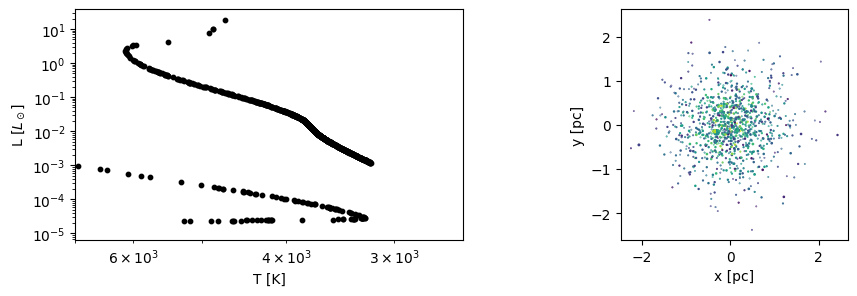

In [12]:
plot_snapshot(stars_C)

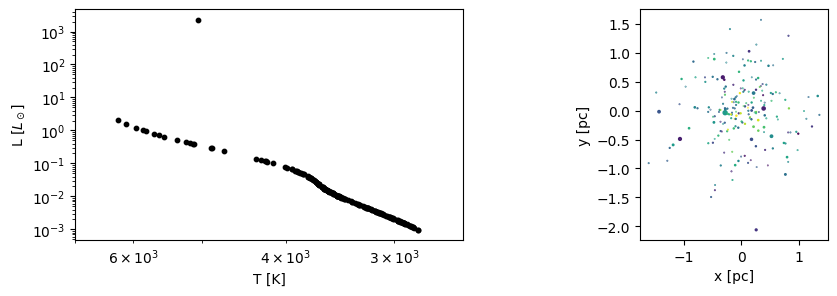

In [13]:
plot_snapshot(stars_N)

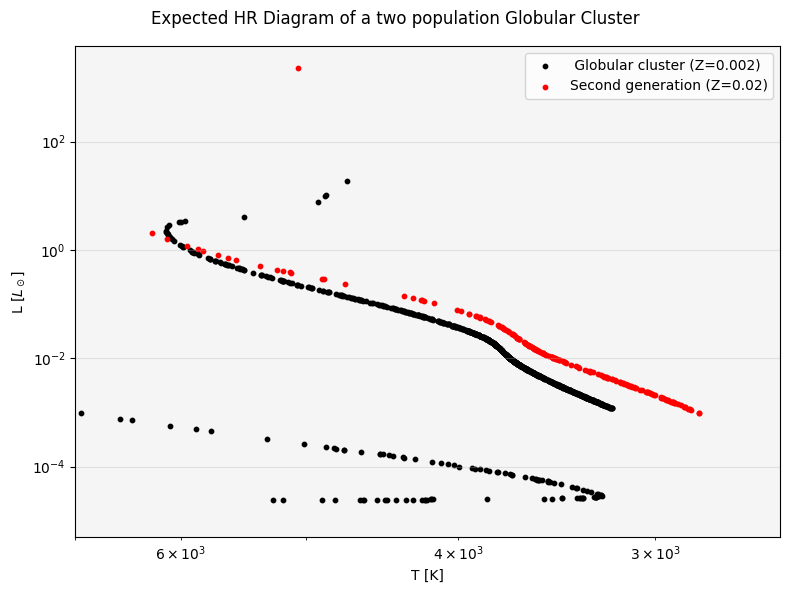

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('whitesmoke')

ax.scatter(stars_C.temperature.value_in(units.K),
            stars_C.luminosity.value_in(units.LSun), 
            c='k',
            s= 10, label = ' Globular cluster (Z=0.002)')
ax.scatter(stars_N.temperature.value_in(units.K),
            stars_N.luminosity.value_in(units.LSun), 
            c='r',
            s= 10, label = 'Second generation (Z=0.02)')
ax.set_xlim(7E+3, 2.5E+3)

#ax.set_ylim(1.e+3, 1.e+7)
ax.loglog()
ax.grid(alpha = 0.3)
ax.legend()
ax.set_xlabel("T [K]")
ax.set_ylabel("L [$L_\odot$]")
fig.suptitle(r'Expected HR Diagram of a two population Globular Cluster')
plt.tight_layout()
#plt.show()
plt.savefig('YESSIR.pdf')

### def count_compact_objects(stars):
    N_compact = 0
    for i in range(len(stars)):
        type = stars[i].stellar_type.value_in(units.stellar_type)
        if ((type>= 10) and (type<= 14)):
         N_compact+=1
    return N_compact

In [11]:
count_compact_objects(stars)

131

In [14]:
def stellar_types(stars, n_stars):
    main_sequence = 0
    white_dwarfs = 0
    neutron_stars = 0
    black_holes = 0
    
    unique, counts = np.unique(stars.stellar_type, return_counts=True) 
    types = [unique[i].value for i in range(len(unique))]
    for t in range(len(types)):
        if types[t] == 1:
            main_sequence += counts[t]
            
        elif types[t] == 10 or types[t] == 11 or types[t] == 12:
            white_dwarfs += counts[t]
            
        elif types[t] == 13:
            neutron_stars += counts[t]
            
        elif types[t] == 14:
            black_holes += counts[t]
    
    return main_sequence, white_dwarfs, neutron_stars, black_holes

values = stellar_types(stars, number_of_stars )
print(f"Kroupa. Main sequence = {values[0]}. White dwarfs {values[1]}.",
      f"Neutron Stars = {values[2]}. Black holes = {values[3]}.")

Kroupa. Main sequence = 867. White dwarfs 120. Neutron Stars = 5. Black holes = 6.
